# Resampling

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from vmc.interface import *
from vmc import run_experiment, sample_local_energies, run_all

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
hbar = 1.0

step_length = 1.0

alpha_min = 0.3
alpha_max = 0.9
num_alphas = 16

parameter_names = ["alpha"]

alphas = np.linspace(
    alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

num_particles = 5
num_dimensions = 3

num_samples = int(1e5)
num_thermalization_steps = int(num_particles * 2000)

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps,
    "sample_local_energies": True}

In [4]:
wavefunction = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler = PySampler(wavefunction, PyHarmonicOscillator(), PyImportanceMetropolis())

In [5]:
df = run_all(sampler, alphas, parameter_names, 1000, **kwargs)

100%|██████████| 16/16 [00:17<00:00,  1.08s/it]


In [6]:
display(df)

,alpha,energy,variance,std,acceptance,sampling_time,boot_var,boot_std,block_var,block_std
0,0.30,8.508013,2.172240e-05,0.004661,0.79563,0.076437,2.095448e-05,0.004578,0.000409,0.020234
1,0.34,8.044905,1.150980e-05,0.003393,0.75518,0.057088,1.168901e-05,0.003419,0.000219,0.014807
2,0.38,7.777913,5.785735e-06,0.002405,0.71088,0.054771,5.809440e-06,0.002410,0.000114,0.010684
3,0.42,7.605588,2.353481e-06,0.001534,0.66659,0.054728,2.507386e-06,0.001583,0.000050,0.007054
4,0.46,7.527623,5.084430e-07,0.000713,0.62478,0.055610,5.439604e-07,0.000738,0.000011,0.003286
5,0.50,7.500000,0.000000e+00,0.000000,0.58347,0.054120,0.000000e+00,0.000000,0.000000,0.000000
6,0.54,7.520558,4.670346e-07,0.000683,0.54398,0.054252,4.734458e-07,0.000688,0.000012,0.003519
7,0.58,7.584960,1.677186e-06,0.001295,0.49768,0.054012,1.669953e-06,0.001292,0.000046,0.006751
8,0.62,7.655510,3.489348e-06,0.001868,0.46087,0.054045,3.405826e-06,0.001845,0.000103,0.010160
9,0.66,7.793747,5.966589e-06,0.002443,0.42100,0.053846,5.911668e-06,0.002431,0.000192,0.013856


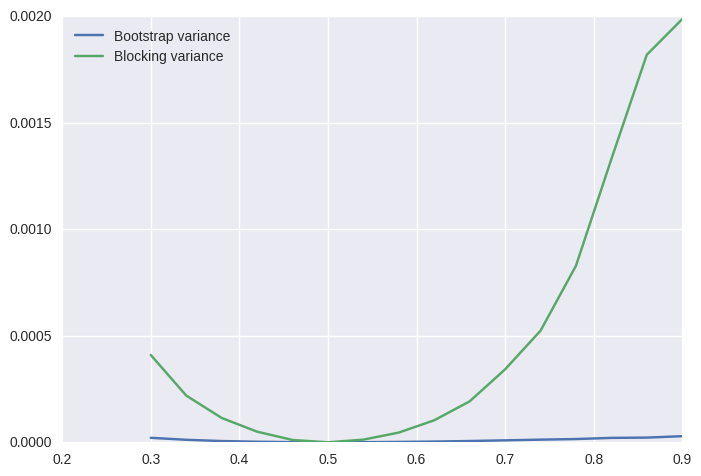

In [7]:
plt.plot(df["alpha"], df["boot_var"], label="Bootstrap variance")
plt.plot(df["alpha"], df["block_var"], label="Blocking variance")
plt.legend(loc="best")
plt.show()

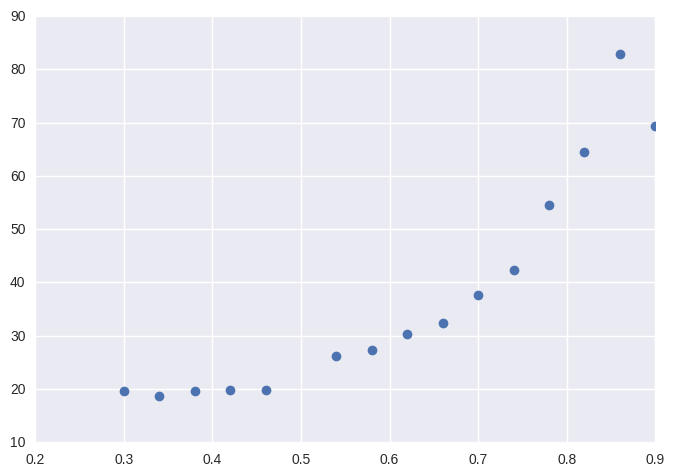

In [8]:
plt.plot(df["alpha"], df["block_var"]/df["boot_var"], "o")
plt.show()

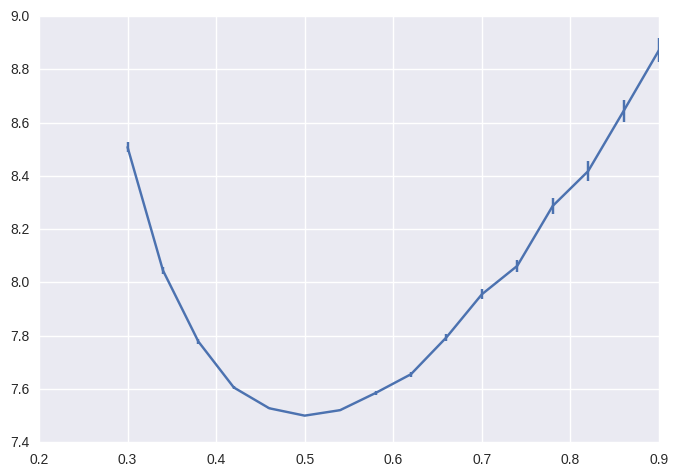

In [9]:
plt.errorbar(
    df["alpha"], df["energy"], yerr=df["block_std"])
plt.show()